In [ ]:
#To avoid showing any warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [ ]:
import pandas as pd
deliverydata = pd.read_csv("delivery_time.csv")
deliverydata

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
deliverydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

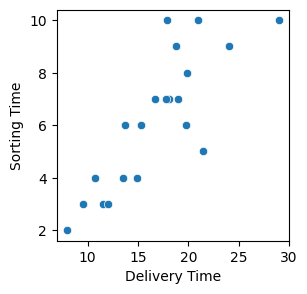

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (3,3))
sns.scatterplot(x = 'Delivery Time'	 ,y = 'Sorting Time' ,data = deliverydata,palette = 'Set1')



<Axes: xlabel='Delivery Time', ylabel='Density'>

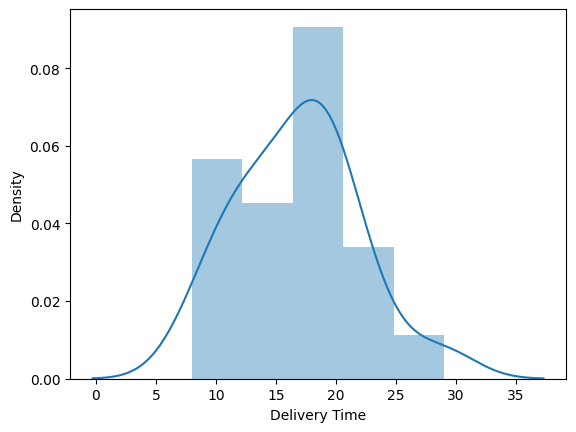

In [ ]:
import seaborn as sns
sns.distplot(deliverydata['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

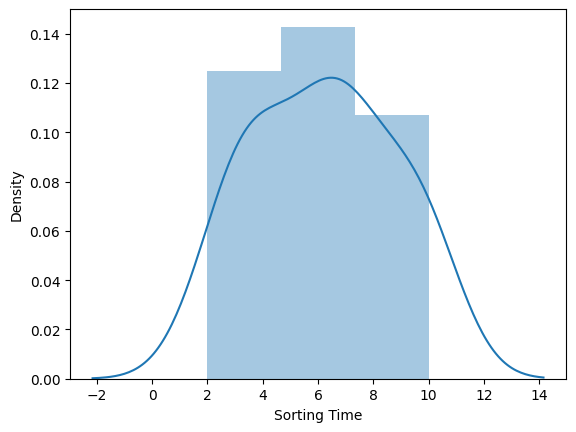

In [ ]:
sns.distplot(deliverydata['Sorting Time'])

In [ ]:
# Renaming Columns
deliverydata=deliverydata.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
deliverydata

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
#Correlation Analysis
deliverydata.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

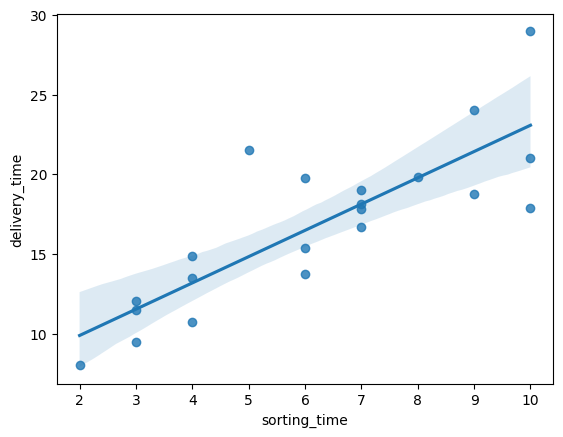

In [ ]:
sns.regplot(x=deliverydata['sorting_time'],y=deliverydata['delivery_time'])


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
#Model Building
model= smf.ols("delivery_time~sorting_time",data=deliverydata).fit()


In [ ]:
#Model Testing
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [ ]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [ ]:
deliverydata.head()


,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


y = B0 + B1*X1 + e


y = c  +  m*x

In [ ]:
6.582734 + (1.649020*10)

23.072933999999997

In [ ]:
6.582734 + (1.649020*4)

13.178814

In [ ]:
#To see the model predictions
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

# y = B0 + B1*X1 + e
B0 - Intercept
B1 - Slope
X1 - Independent data point
e (error) - Vertical distance between the actual 'Sunday' value & the Sunday fitted value

In [ ]:
deliverydata['Predicted']=model.fittedvalues
deliverydata[0:21]

,delivery_time,sorting_time,Predicted
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [ ]:
#For Manual Calculations
deliverydata['Predicted1']= 6.582734 + (1.649020* deliverydata['sorting_time'])
deliverydata[0:21]

,delivery_time,sorting_time,Predicted,Predicted1
0,21.00,10,23.072933,23.072934
1,13.50,4,13.178814,13.178814
2,19.75,6,16.476853,16.476854
3,24.00,9,21.423913,21.423914
4,29.00,10,23.072933,23.072934
5,15.35,6,16.476853,16.476854
6,19.00,7,18.125873,18.125874
7,9.50,3,11.529794,11.529794
8,17.90,10,23.072933,23.072934
9,18.75,9,21.423913,21.423914


In [ ]:
#To generate the residual values
#Difference between Actual & Fitted Values
deliverydata['Error']=model.resid
deliverydata[0:21]

,delivery_time,sorting_time,Predicted,Predicted1,Error
0,21.00,10,23.072933,23.072934,-2.072933
1,13.50,4,13.178814,13.178814,0.321186
2,19.75,6,16.476853,16.476854,3.273147
3,24.00,9,21.423913,21.423914,2.576087
4,29.00,10,23.072933,23.072934,5.927067
5,15.35,6,16.476853,16.476854,-1.126853
6,19.00,7,18.125873,18.125874,0.874127
7,9.50,3,11.529794,11.529794,-2.029794
8,17.90,10,23.072933,23.072934,-5.172933
9,18.75,9,21.423913,21.423914,-2.673913


In [ ]:
deliverydata['Error1']=deliverydata['delivery_time'] -deliverydata['Predicted']
deliverydata[0:21]

,delivery_time,sorting_time,Predicted,Predicted1,Error,Error1
0,21.00,10,23.072933,23.072934,-2.072933,-2.072933
1,13.50,4,13.178814,13.178814,0.321186,0.321186
2,19.75,6,16.476853,16.476854,3.273147,3.273147
3,24.00,9,21.423913,21.423914,2.576087,2.576087
4,29.00,10,23.072933,23.072934,5.927067,5.927067
5,15.35,6,16.476853,16.476854,-1.126853,-1.126853
6,19.00,7,18.125873,18.125874,0.874127,0.874127
7,9.50,3,11.529794,11.529794,-2.029794,-2.029794
8,17.90,10,23.072933,23.072934,-5.172933,-5.172933
9,18.75,9,21.423913,21.423914,-2.673913,-2.673913


In [ ]:
deliverydata['Error_Sq']=(deliverydata['Error'])**2
deliverydata[0:21]

,delivery_time,sorting_time,Predicted,Predicted1,Error,Error1,Error_Sq
0,21.00,10,23.072933,23.072934,-2.072933,-2.072933,4.297051
1,13.50,4,13.178814,13.178814,0.321186,0.321186,0.103161
2,19.75,6,16.476853,16.476854,3.273147,3.273147,10.713489
3,24.00,9,21.423913,21.423914,2.576087,2.576087,6.636224
4,29.00,10,23.072933,23.072934,5.927067,5.927067,35.130124
5,15.35,6,16.476853,16.476854,-1.126853,-1.126853,1.269798
6,19.00,7,18.125873,18.125874,0.874127,0.874127,0.764098
7,9.50,3,11.529794,11.529794,-2.029794,-2.029794,4.120062
8,17.90,10,23.072933,23.072934,-5.172933,-5.172933,26.759235
9,18.75,9,21.423913,21.423914,-2.673913,-2.673913,7.149811


In [ ]:
deliverydata['Y']=  6.582734 + (1.649020 * deliverydata['delivery_time']) + deliverydata['Error']
deliverydata[0:21]

,delivery_time,sorting_time,Predicted,Predicted1,Error,Error1,Error_Sq,Y
0,21.00,10,23.072933,23.072934,-2.072933,-2.072933,4.297051,39.139221
1,13.50,4,13.178814,13.178814,0.321186,0.321186,0.103161,29.165690
2,19.75,6,16.476853,16.476854,3.273147,3.273147,10.713489,42.424026
3,24.00,9,21.423913,21.423914,2.576087,2.576087,6.636224,48.735301
4,29.00,10,23.072933,23.072934,5.927067,5.927067,35.130124,60.331381
5,15.35,6,16.476853,16.476854,-1.126853,-1.126853,1.269798,30.768338
6,19.00,7,18.125873,18.125874,0.874127,0.874127,0.764098,38.788241
7,9.50,3,11.529794,11.529794,-2.029794,-2.029794,4.120062,20.218630
8,17.90,10,23.072933,23.072934,-5.172933,-5.172933,26.759235,30.927259
9,18.75,9,21.423913,21.423914,-2.673913,-2.673913,7.149811,34.827946


In [ ]:
Mean_Squared_Error=deliverydata['Error_Sq'].mean()
Mean_Squared_Error

7.793311548584062

In [ ]:
model.rsquared

0.6822714748417231

In [ ]:
model.pvalues


Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [ ]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [ ]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Simple Linear Regression-2

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
# Checking Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
# Checking for Null Values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
# Checking for Duplicate Values
df[df.duplicated()].shape

(0, 2)

In [ ]:
df[df.duplicated()]

,YearsExperience,Salary


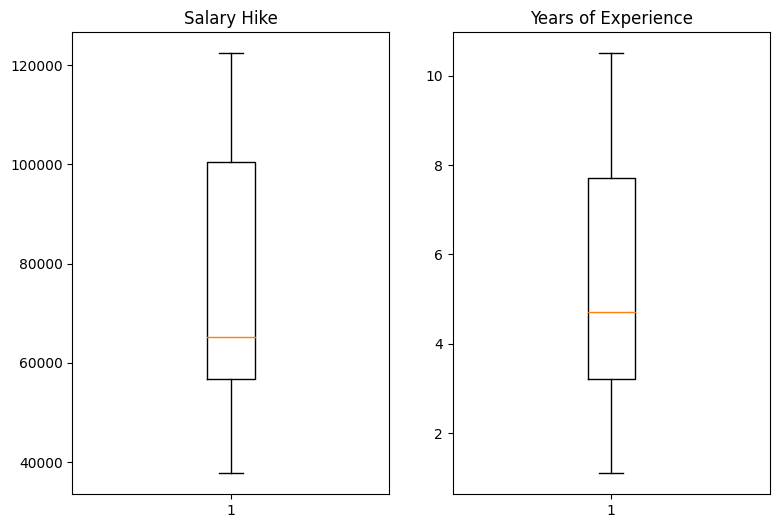

In [ ]:
# Plotting the data to check for outliers
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

In [ ]:
# Checking the Correlation between variables
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

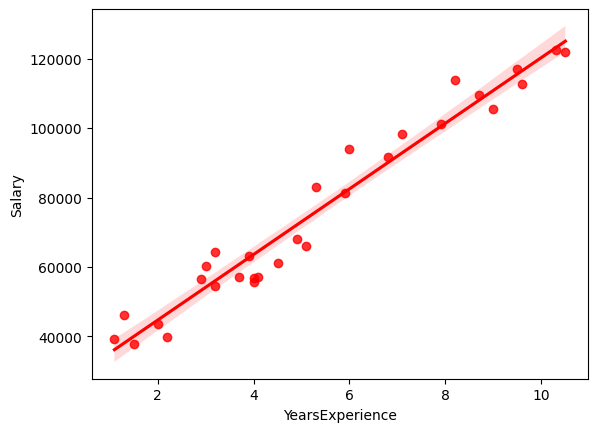

In [ ]:
# Visualization of Correlation beteen x and y
# regplot = regression plot
sns.regplot(x=df['YearsExperience'],y=df['Salary'], color='red')

In [ ]:
#As you can see above
#There is good correlation between the two variable.
#The score is more than 0.8 which is a good sign

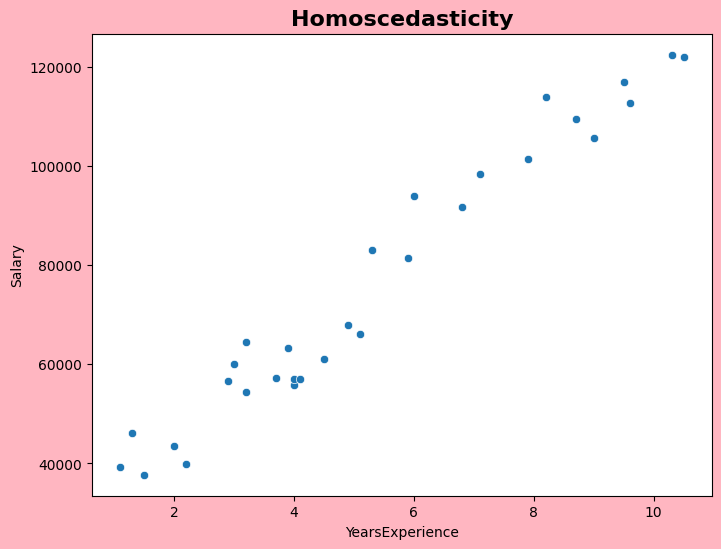

In [ ]:
# Checking for Homoscedasticity or Hetroscedasticity
plt.figure(figsize = (8,6), facecolor = 'lightpink')
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [ ]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

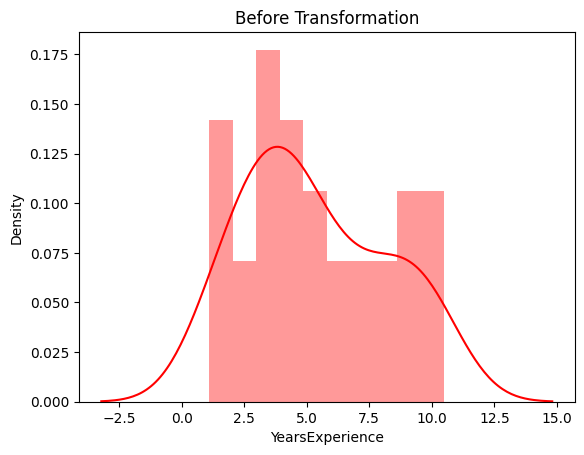

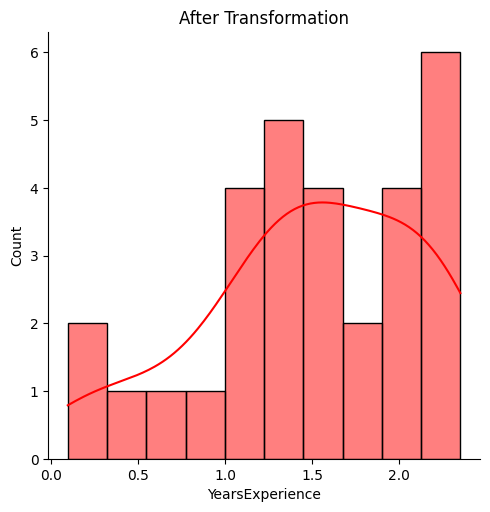

In [ ]:
# Trying different transformation of data to estimate normal distribution and remove any skewness
sns.distplot(df['YearsExperience'], bins = 10, kde = True, color='red')
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True, color='red')
plt.title('After Transformation')
plt.show()

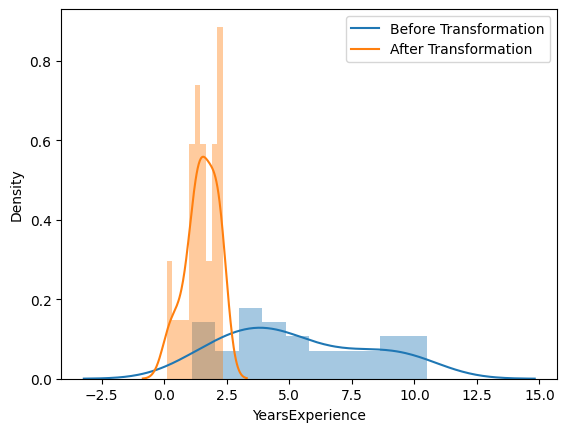

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

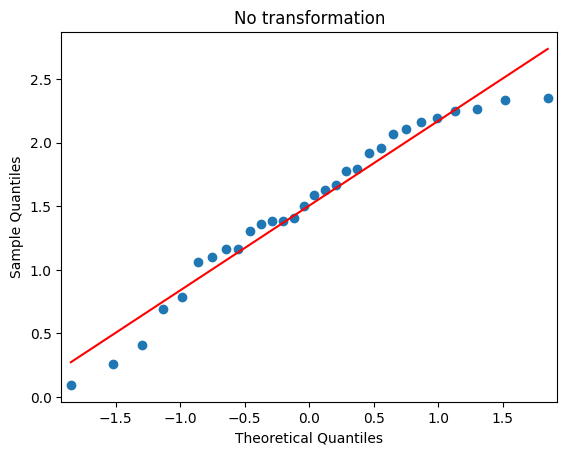

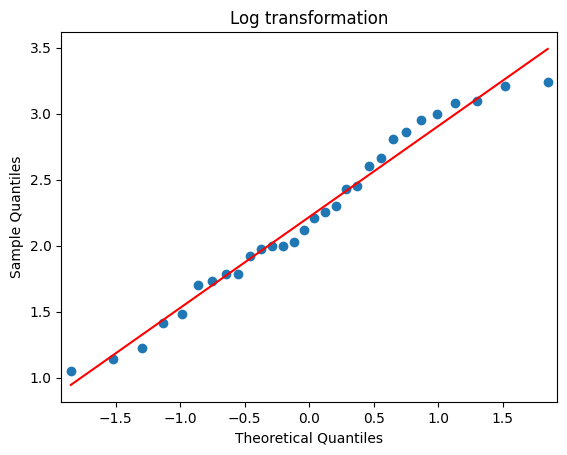

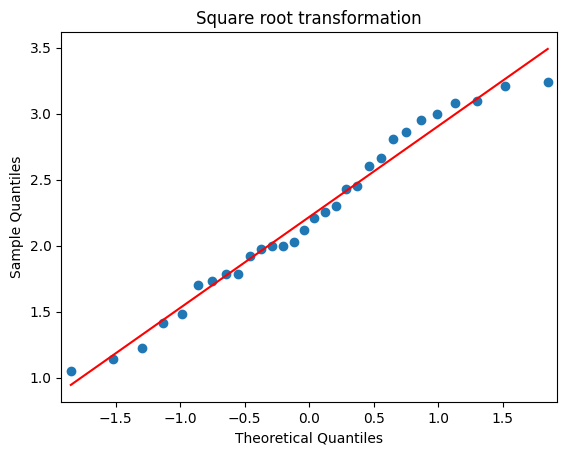

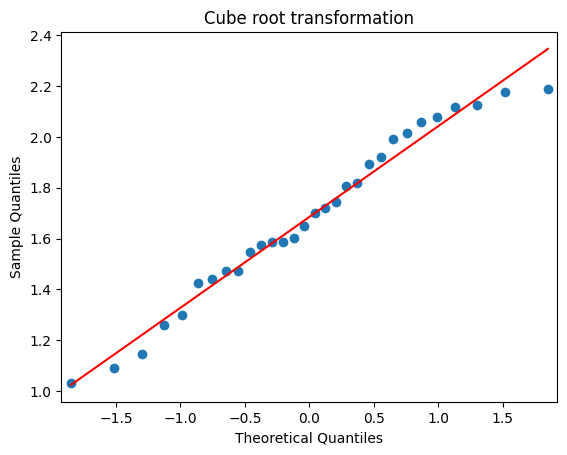

In [ ]:
# How log transformation affects the data and it scales the values down.
# Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)
smf.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

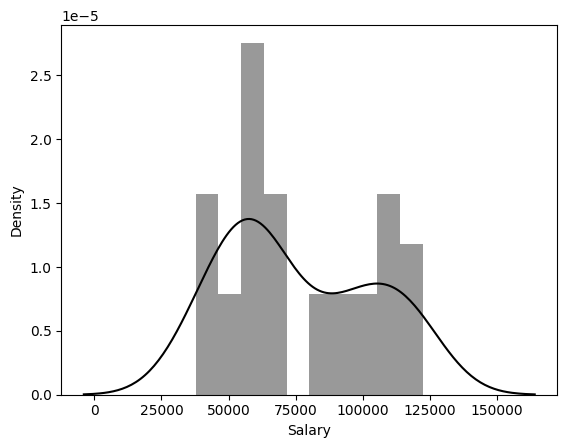

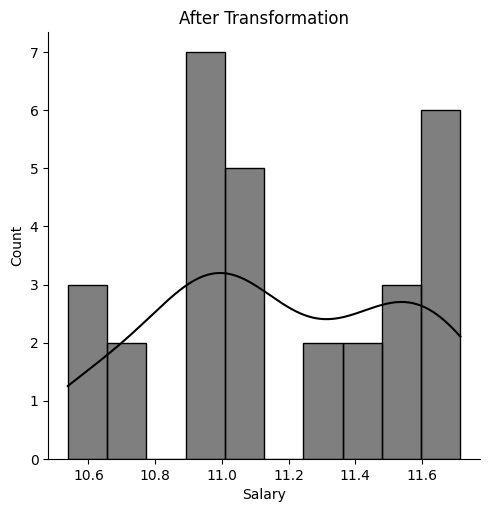

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Salary'], bins = 10, kde = True, color='black')
sns.displot(np.log(df['Salary']), bins = 10, kde = True, color='black')
plt.title('After Transformation')
plt.show()

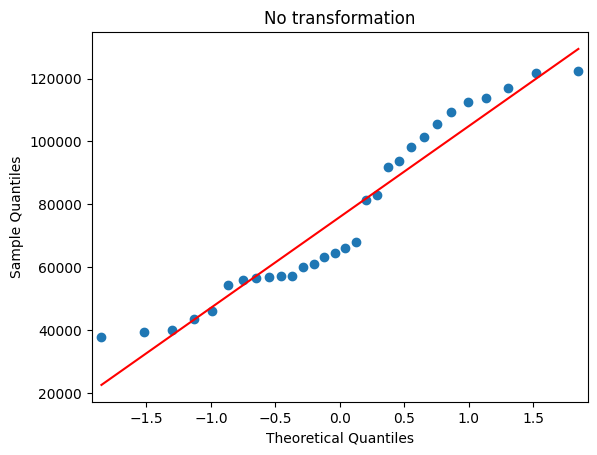

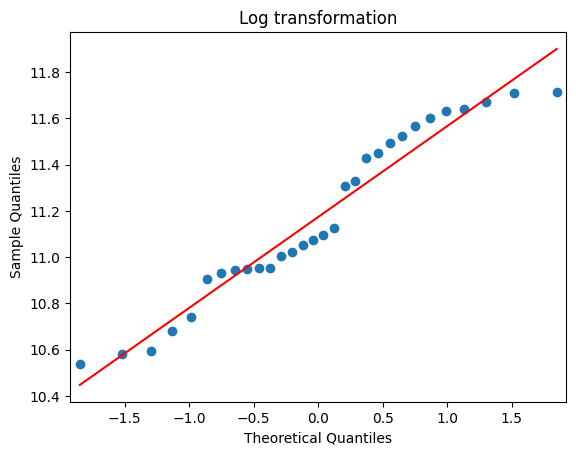

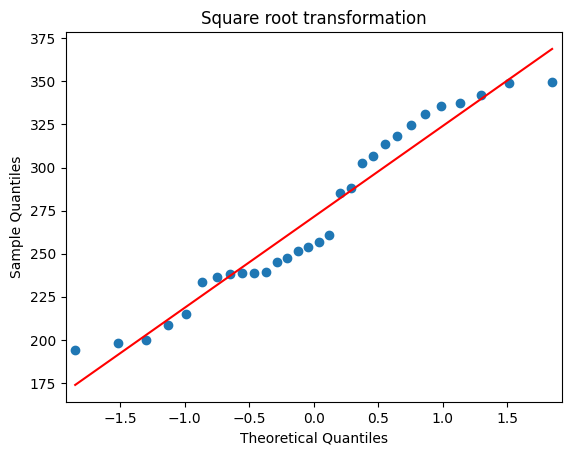

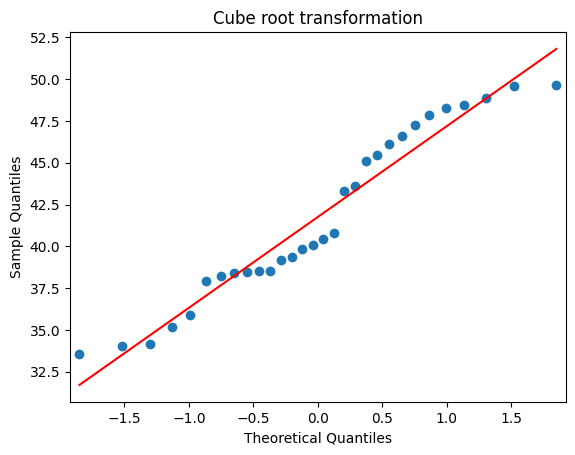

In [ ]:
smf.qqplot(df['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [ ]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = df).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        11:33:59   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Square Root transformation on data
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           7.58e-19
Time:                        11:34:17   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Cuberoot transformation on Data
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           6.37e-18
Time:                        11:34:30   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Log transformation on Data
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           7.40e-16
Time:                        11:34:42   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Model Testing
#As Y = Beta0 + Beta1*(X)
#Finding Coefficient Parameters (Beta0 and Beta1 values)
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [ ]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

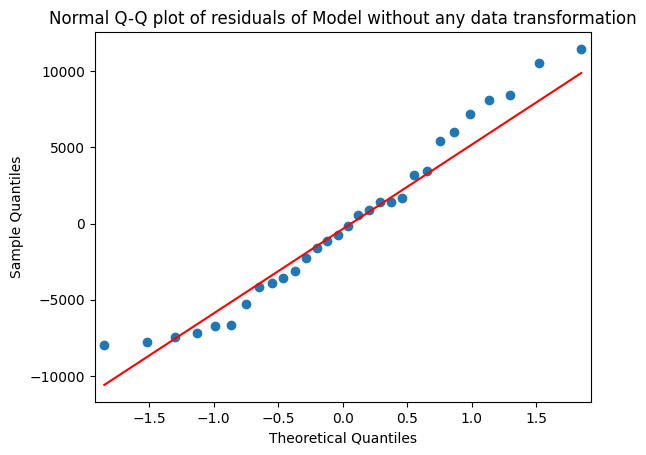

In [ ]:
# Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

In [ ]:
# Residual Plot to check Homoscedasticity or Hetroscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

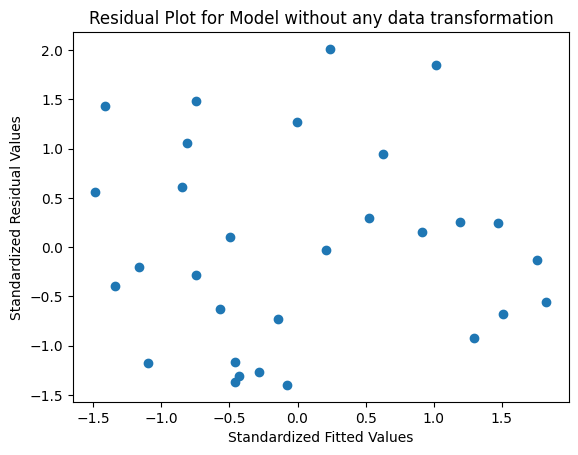

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [ ]:
# Comparing different models with respect to the Root Mean Squared Errors
from sklearn.metrics import mean_squared_error

In [ ]:
model1_pred_y =np.square(model1.predict(df['YearsExperience']))
model2_pred_y =pow(model2.predict(df['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(df['YearsExperience']))

In [ ]:
model1_rmse =np.sqrt(mean_squared_error(df['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model1= 5960.647096174318 
model2= 6232.815455835847 
model3= 7219.716974372806


In [ ]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

As model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model to predict our values
Model is that Simple Linear regression model where we did not perfrom any data transformation and got the highest Adjusted R-squared value

In [ ]:
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = df.YearsExperience
predicted2['Salary'] = df.Salary
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted2.YearsExperience))
predicted2

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
